In [41]:
import pandas as pd
import numpy as np
import json
import scipy.io.wavfile as wav
import numpy as np
from scipy.fft import fft
from scipy.fft import ifft
import matplotlib.pyplot as plt
import librosa

from sklearn.cluster import SpectralClustering

In [7]:
my_data = pd.read_csv("data.csv")
my_data

,name,popularity,url,arr,sr
0,New Jeans,85,https://p.scdn.co/mp3-preview/a37b4269b0dc5e95...,"[-0.002433449, -0.0044915974, -0.004369557, -0...",22050
1,Super Shy,92,https://p.scdn.co/mp3-preview/dab062e2cc708a26...,"[-0.0020927936, 0.006485328, -0.0045665354, -0...",22050
2,New Jeans,76,https://p.scdn.co/mp3-preview/a37b4269b0dc5e95...,"[-0.002433449, -0.0044915974, -0.004369557, -0...",22050
3,ETA,87,https://p.scdn.co/mp3-preview/e076cd31805e449d...,"[-0.0016327277, 0.0028921515, 0.0040700883, -0...",22050
4,Attention,81,https://p.scdn.co/mp3-preview/7794e6d9c9f2b8ce...,"[0.0009280145, 0.005229354, 0.0032640994, 0.00...",22050
5,OMG,87,https://p.scdn.co/mp3-preview/b9e344aa96afc45a...,"[0.0047766715, -0.0021011978, 0.0037831068, -0...",22050
6,Hype Boy,84,https://p.scdn.co/mp3-preview/7c55950057fc446d...,"[0.0013099611, 0.0030141324, -0.0049063414, -0...",22050
7,New Jeans,25,https://p.scdn.co/mp3-preview/5e9dc087928b16b9...,"[-0.00045173615, -0.0009777602, -0.0013395064,...",22050
8,Ditto,85,https://p.scdn.co/mp3-preview/4f048713ddfa4345...,"[0.009391636, 0.0032518953, -0.0013424307, 0.0...",22050
9,Cool With You,85,https://p.scdn.co/mp3-preview/598e05a7fd20278a...,"[0.005515009, 0.008472621, 0.0053211898, 0.004...",22050


In [21]:
# Check if I can change array back into sound

testArr = np.array(json.loads(my_data.arr[0]))
testArr
# Replace 'sound_array' with your actual sound array
sample_rate = 22050  # Adjust this to match the sample rate of your audio
wav.write("output.wav", sample_rate, testArr)

# Need to Decompose the Sound (Cocktail Party Problem)

The main problem is deciding the form of array that we want to train the model on; some ideas are ICA, Fourier Decomposition, and training on raw data.

In [26]:
# try fft

fft_result = fft(testArr)

sample_rate = 22050  # Replace with the actual sample rate of your audio
n = len(testArr)
frequencies = np.fft.fftfreq(n, d=1.0/sample_rate)
magnitude_spectrum = np.abs(fft_result)

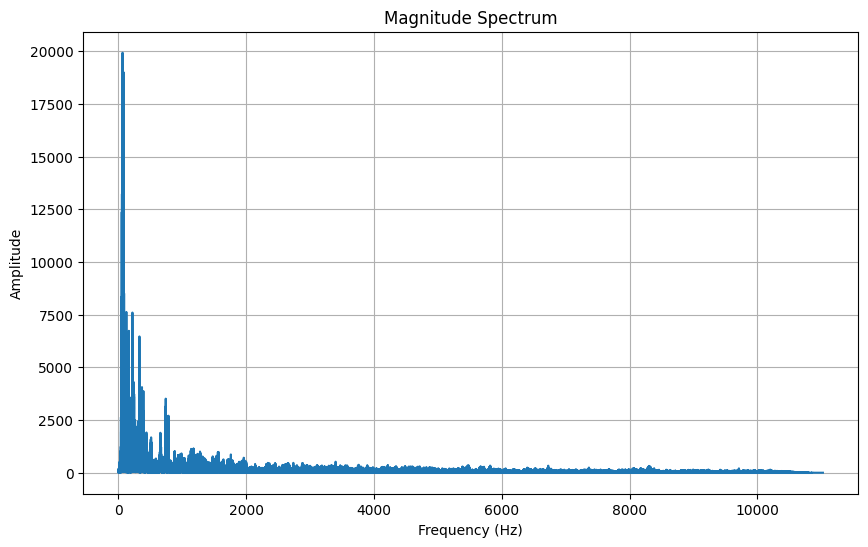

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:n//2], np.abs(fft_result[:n//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Magnitude Spectrum')
plt.grid()
plt.show()

In [74]:
# Assuming 'sound_array' is your audio data
sample_rate = 22050
start_frequency = 500  # Start frequency of the desired range in Hz 20-200, 500-4000, 200-500
end_frequency = 4000  # End frequency of the desired range in Hz

# Perform the FFT to transform the sound to the frequency domain
sound_spectrum = fft(testArr)

# Calculate the frequency axis corresponding to the FFT result
frequencies = np.fft.fftfreq(len(testArr), d=1.0/sample_rate)

# Find the indices that correspond to the frequency range
start_index = int(start_frequency * len(testArr) / sample_rate)
end_index = int(end_frequency * len(testArr) / sample_rate)

# Create a new spectrum with only the frequency components within the desired range
target_spectrum = np.zeros_like(sound_spectrum)
target_spectrum[start_index:end_index] = sound_spectrum[start_index:end_index]

# Perform the inverse FFT to get the sound with the desired frequency range
extracted_sound = ifft(target_spectrum)

# Convert the complex values to real values (take the real part)
extracted_sound = np.real(extracted_sound)

# If necessary, you can normalize the reconstructed sound
extracted_sound = extracted_sound / np.max(np.abs(extracted_sound))
wav.write("output_1.wav", sample_rate, extracted_sound)

# ICA

In [51]:
import numpy as np
from sklearn.decomposition import FastICA
import soundfile as sf

# Perform ICA to separate audio sources
n_components = 2  # Number of components/sources to extract
ica = FastICA(n_components=n_components)
separated_sources = ica.fit_transform(testArr.reshape(-1, 1))

# Save the separated sources as individual audio files
for i, source in enumerate(separated_sources.T):
    sf.write(f'separated_source_{i}.wav', source, 22050)

/Users/yiboliang/Projects/weTheArtist/venv/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:582: UserWarning: n_components is too large: it will be set to 1
  warnings.warn(
